In [48]:
import pandas as pd
import os
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import seaborn as sns

In [32]:
pd.options.display.max_rows=15
%matplotlib inline

In [3]:
train_file_path = os.path.join(os.pardir, 'data', 'raw','train.csv')
test_file_path = os.path.join(os.pardir, 'data', 'raw', 'test.csv')

In [4]:
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

In [5]:
df_train

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
...,...,...,...
1306115,ffffc0c7158658a06fd9,How do I consume 150 gms protein daily both ve...,0
1306116,ffffc404da586ac5a08f,What are the good career options for a msc che...,0


In [6]:
df_train.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
df_test

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?
5,000a2d30e3ffd70c070d,How well are you adapting to the Trump era?
6,000b67672ec9622ff761,What should be the last thing people do in life?
...,...,...
56363,fffb418e5e087182294d,How can I make squid tender?
56364,fffc3df92967fc1ff426,Why did England become the biggest colonial po...


In [8]:
df_train.question_text.loc[df_train.target == 1]

22         Has the United States become the largest dicta...
30         Which babies are more sweeter to their parents...
110        If blacks support school choice and mandatory ...
114        I am gay boy and I love my cousin (boy). He is...
115                     Which races have the smallest penis?
119                        Why do females find penises ugly?
127        How do I marry an American woman for a Green C...
                                 ...                        
1306031    Why do Jews want endless immigration to the US...
1306071    Will Oprah buy the DNC to guarantee her nomina...
1306093    How is it to have intimate relation with your ...
1306094    Why is it when singers have lyrics about voice...
1306099                    Do pakis smell of curry and shit?
1306103    Isn't Trump right after all? Why should the US...
1306112                  Are you ashamed of being an Indian?
Name: question_text, Length: 80810, dtype: object

In [9]:
df_train.question_text.loc[0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [10]:
df_train['length']=df_train.question_text.apply(lambda x : len(x.split()))

In [11]:
df_train['length']

0          13
1          16
2          10
3           9
4          15
5          10
6          18
           ..
1306115    15
1306116    14
1306117    17
1306118    19
1306119     4
1306120    13
1306121    11
Name: length, Length: 1306122, dtype: int64

In [12]:
df_train.groupby(['target'])['length'].mean()

target
0    12.508533
1    17.277812
Name: length, dtype: float64

In [13]:
df_train.groupby(['target'])['length'].median()

target
0    11
1    15
Name: length, dtype: int64

In [19]:
print(f'Max length of sentence in train data {np.max(df_train.question_text.apply(lambda x: len(x.split())))}')

Max length of sentence in train 134


In [21]:
print(f'Max length of sentence in test data {np.max(df_test.question_text.apply(lambda x: len(x.split())))}')

Max length of sentence in test data 87


In [23]:
print('Average word length of questions in training data {0:.0f}'.format(np.mean(df_train.question_text.apply(lambda x: len(x.split())))))

Average word length of questions in training data 13


In [25]:
print('Average word length of questions in testing data {0:.0f}'.format(np.mean(df_test.question_text.apply(lambda x: len(x.split())))))

Average word length of questions in testing data 13


In [26]:
print('Average word length of questions in training data {0:.0f}'.format(np.mean(df_train.question_text.apply(lambda x: len(x)))))

Average word length of questions in training data 71


In [27]:
print('Average word length of questions in training data {0:.0f}'.format(np.mean(df_test.question_text.apply(lambda x: len(x)))))

Average word length of questions in training data 70


In [29]:
max_features = 50000
tk = Tokenizer(lower = True, filters='', num_words=max_features)
full_text = list(df_train['question_text'].values) + list(df_test['question_text'].values)

In [30]:
tk.fit_on_texts(full_text)

In [31]:
train_tokenized = tk.texts_to_sequences(df_train['question_text'].fillna('missing'))
test_tokenized = tk.texts_to_sequences(df_test['question_text'].fillna('missing'))

Text(0.5,1,'Distribution of question text length in characters')

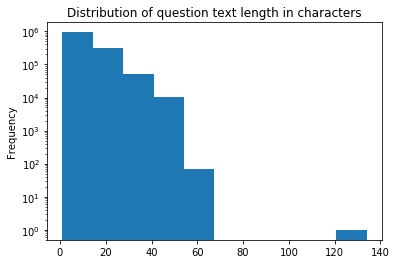

In [36]:
df_train['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in characters')

In [37]:
## Number of words in the text ##
df_train["num_words"] = df_train["question_text"].apply(lambda x: len(str(x).split()))
df_test["num_words"] = df_test["question_text"].apply(lambda x: len(str(x).split()))

In [38]:
## Number of unique words in the text ##
df_train["num_unique_words"] = df_train["question_text"].apply(lambda x: len(set(str(x).split())))
df_test["num_unique_words"] = df_test["question_text"].apply(lambda x: len(set(str(x).split())))

In [39]:
## Number of characters in the text ##
df_train["num_chars"] = df_train["question_text"].apply(lambda x: len(str(x)))
df_test["num_chars"] = df_test["question_text"].apply(lambda x: len(str(x)))

In [41]:
eng_stopwords = set(stopwords.words("english"))
## Number of stopwords in the text ##
df_train["num_stopwords"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_test["num_stopwords"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

In [43]:
## Number of punctuations in the text ##
df_train["num_punctuations"] =df_train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
df_test["num_punctuations"] =df_test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [44]:
## Number of title case words in the text ##
df_train["num_words_upper"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_test["num_words_upper"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [45]:
## Number of title case words in the text ##
df_train["num_words_title"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_test["num_words_title"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [46]:
## Average length of the words in the text ##
df_train["mean_word_len"] = df_train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test["mean_word_len"] = df_test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


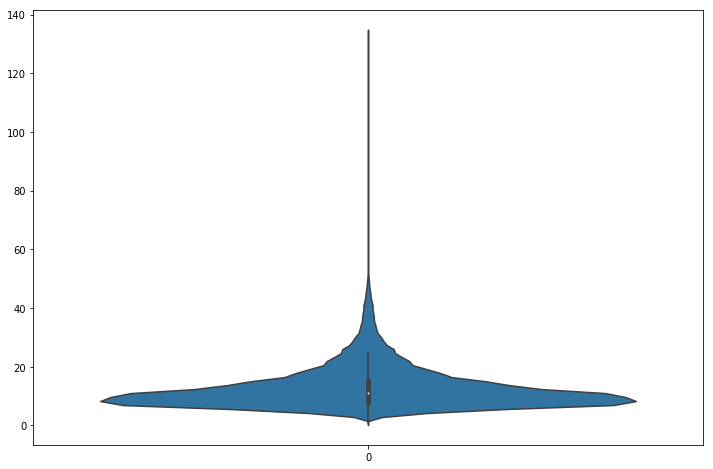

In [49]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_words'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


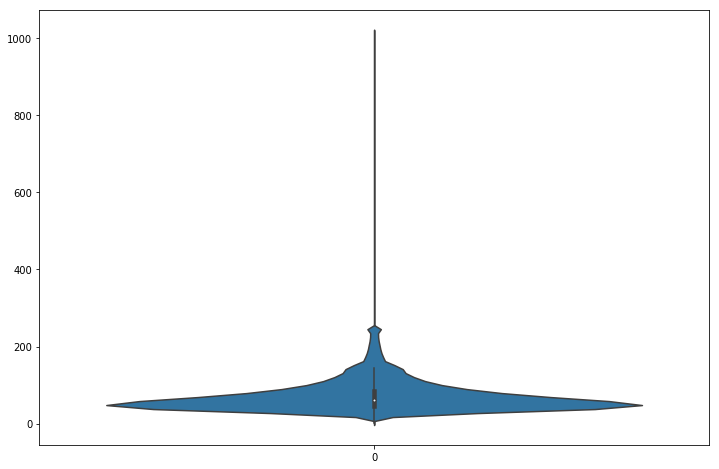

In [50]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_chars'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


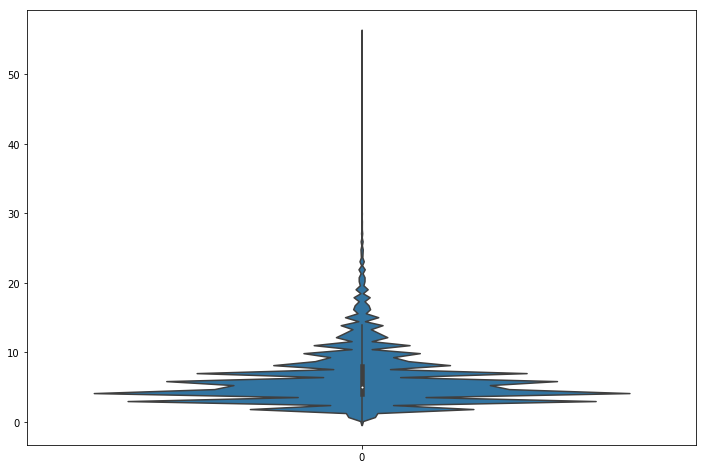

In [51]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_stopwords'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


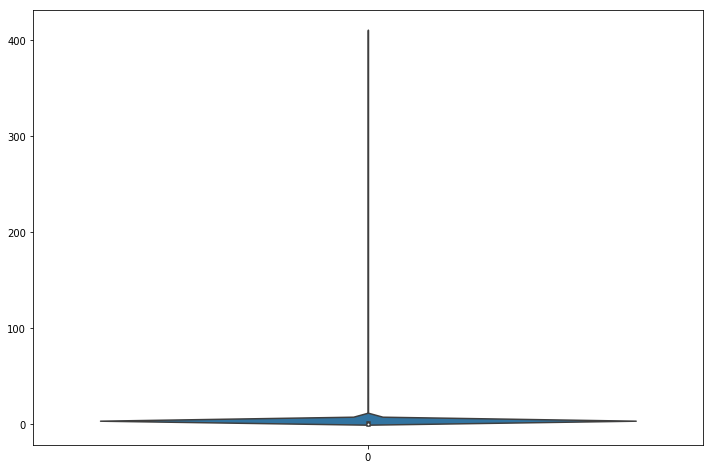

In [52]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_punctuations'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


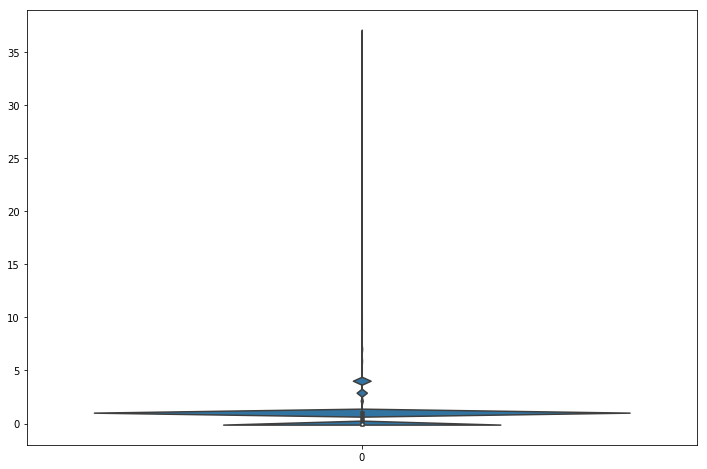

In [53]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_words_upper'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


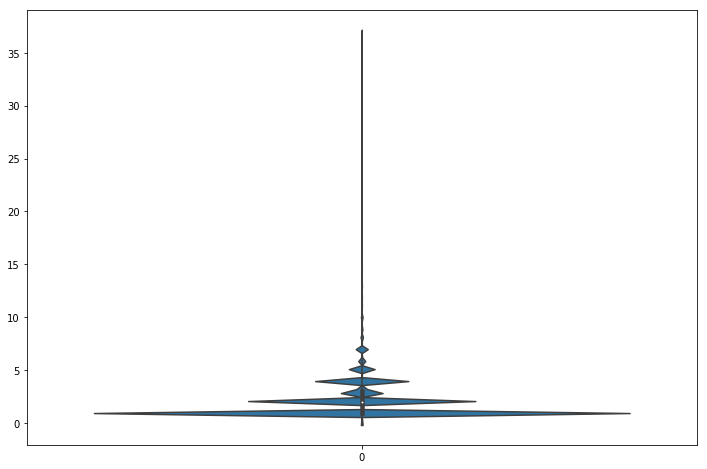

In [54]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_words_title'])
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_train['num_words_title'])
plt.show()